# ゴミ分別（バックエンド）

## データの読み込み
data→浅尾さんが作ってくれたデータです。
dataに画像データの名前があって、画像データそのものは別のファイル(dataset_team4/img_team4/batch_1とか)に入ってます。
ここでは、dataにある画像データの名前から画像データそのものを取ってきて、dataframe型にしたのち、元のdataの横に結合することで一つのdataframeを作りました。
最後に、燃えるゴミ・燃えないゴミ・・のラベルをデータフレーム型にしたものを結合し、labelとimgのみを取り出したdatasetを作成しました。

### 必要なやつのimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
import cv2

### データの読み込み（画像データそのものは別ファイルに保存、その名前がimg_fileの列にあります）

In [2]:
data = pd.read_csv("dataset_team4/df_1_final.csv")

In [3]:
data

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0000,1225.0000,153.0,198.0,14765.5
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0000,55.0000,93.0,88.0,4273.0
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0000,557.0000,89.0,236.0,17734.0
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0000,127.0000,447.0,1322.0,403954.0
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0000,1168.0000,240.0,122.0,23393.0
...,...,...,...,...,...,...,...,...,...,...,...
209,209,3024,4032,batch_14/000086.jpg,Plastic film,Plastic bag & wrapper,1152.1428,1268.2856,376.0,477.0,123008.0
210,210,3024,4032,batch_14/000096.jpg,Glass bottle,Bottle,934.0000,3067.0000,906.0,587.0,196153.5
211,211,3024,4032,batch_15/000040.jpg,Disposable plastic cup,Cup,1231.0000,2246.0000,356.0,360.0,78185.5
212,212,3024,4032,batch_15/000042.jpg,Disposable plastic cup,Cup,1533.0000,2213.0000,312.0,333.0,67954.5


### 試しに一つ画像を読み込んでみる
Imageというやつ（初めにimportしてある）を用いて、画像データの名前から画像データそのものを読み込み・表示。
このデータはnampy型になる。

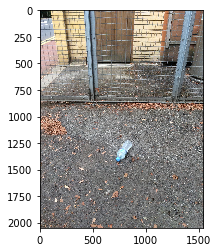

In [4]:
#image_size = 60
image = Image.open('dataset_team4/img_team4/batch_1/000000.jpg')
image = image.convert("RGB")
#image = image.resize((image_size, image_size))
sample = np.asarray(image)
plt.imshow(sample)

### 使う画像データの名前をまとめる。
globってやつで条件に合うものを取り出すことができる。
ここではbatch_1、batch_2、batch_3、、、、、って15個あるフォルダから画像データの名前を取り出してまとめて一つにした。

In [5]:
files_1 = sorted(glob.glob("dataset_team4/img_team4/batch_1/*"))
files_2 = sorted(glob.glob("dataset_team4/img_team4/batch_2/*"))
files_3 = sorted(glob.glob("dataset_team4/img_team4/batch_3/*"))
files_4 = sorted(glob.glob("dataset_team4/img_team4/batch_4/*"))
files_5 = sorted(glob.glob("dataset_team4/img_team4/batch_5/*"))
files_6 = sorted(glob.glob("dataset_team4/img_team4/batch_6/*"))
files_7 = sorted(glob.glob("dataset_team4/img_team4/batch_7/*"))
files_8 = sorted(glob.glob("dataset_team4/img_team4/batch_8/*"))
files_9 = sorted(glob.glob("dataset_team4/img_team4/batch_9/*"))
files_10 = sorted(glob.glob("dataset_team4/img_team4/batch_10/*"))
files_11 = sorted(glob.glob("dataset_team4/img_team4/batch_11/*"))
files_12 = sorted(glob.glob("dataset_team4/img_team4/batch_12/*"))
files_13 = sorted(glob.glob("dataset_team4/img_team4/batch_13/*"))
files_14 = sorted(glob.glob("dataset_team4/img_team4/batch_14/*"))
files_15 = sorted(glob.glob("dataset_team4/img_team4/batch_15/*"))

In [6]:
files = files_1 + files_2 + files_3 + files_4 + files_5 + files_6 + files_7 + files_8 + files_9 + files_10 + files_11 + files_12 + files_13 + files_14 + files_15

In [7]:
files
#filesってリストの中には使うデータの名前がずらっと並んでる

['dataset_team4/img_team4/batch_1/000000.jpg',
 'dataset_team4/img_team4/batch_1/000004.jpg',
 'dataset_team4/img_team4/batch_1/000005.jpg',
 'dataset_team4/img_team4/batch_1/000006.jpg',
 'dataset_team4/img_team4/batch_1/000011.jpg',
 'dataset_team4/img_team4/batch_1/000013.jpg',
 'dataset_team4/img_team4/batch_1/000016.jpg',
 'dataset_team4/img_team4/batch_1/000017.jpg',
 'dataset_team4/img_team4/batch_1/000026.jpg',
 'dataset_team4/img_team4/batch_1/000027.jpg',
 'dataset_team4/img_team4/batch_1/000029.jpg',
 'dataset_team4/img_team4/batch_1/000030.jpg',
 'dataset_team4/img_team4/batch_1/000031.jpg',
 'dataset_team4/img_team4/batch_1/000069.JPG',
 'dataset_team4/img_team4/batch_1/000070.JPG',
 'dataset_team4/img_team4/batch_1/000073.JPG',
 'dataset_team4/img_team4/batch_1/000105.JPG',
 'dataset_team4/img_team4/batch_2/000018.JPG',
 'dataset_team4/img_team4/batch_2/000019.JPG',
 'dataset_team4/img_team4/batch_2/000040.JPG',
 'dataset_team4/img_team4/batch_2/000046.JPG',
 'dataset_tea

### 画像データそのものを読み込んでいく
一つ上でまとめた画像データの名前をもとに、読み込んでいく。
imagesの中には画像データそのものが入っていく。

In [8]:
images = []

for i in files:
    #image_size = 60
    image = Image.open(i)
    image = image.convert("RGB")
    #image = image.resize((image_size, image_size))
    image_diverse = np.asarray(image)
    images.append(image_diverse)

In [9]:
images[0]
#試しに初めのデータをみてみる。numpy型になっている。

array([[[ 28,  28,  26],
        [ 31,  31,  29],
        [ 33,  33,  31],
        ...,
        [216, 229, 220],
        [226, 242, 231],
        [233, 242, 237]],

       [[ 29,  29,  27],
        [ 31,  31,  29],
        [ 32,  32,  30],
        ...,
        [221, 234, 225],
        [239, 255, 244],
        [236, 245, 240]],

       [[ 31,  31,  29],
        [ 31,  31,  29],
        [ 30,  32,  29],
        ...,
        [222, 235, 226],
        [235, 251, 240],
        [237, 246, 241]],

       ...,

       [[129, 123, 125],
        [128, 122, 124],
        [126, 120, 122],
        ...,
        [191, 161, 153],
        [186, 153, 144],
        [172, 142, 132]],

       [[123, 114, 117],
        [121, 112, 115],
        [118, 109, 112],
        ...,
        [178, 148, 140],
        [151, 118, 109],
        [135, 104,  99]],

       [[117, 106, 114],
        [112, 101, 109],
        [110,  99, 105],
        ...,
        [147, 115, 116],
        [132,  98,  99],
        [120,  90,  92]]

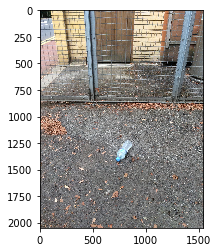

In [10]:
plt.imshow(images[0])
#確かに一番初めの画像が読み込まれている。

### ゴミがある部分だけの切り出し。
背景があると邪魔だから、ゴミがある部分だけを切り出してtrm_imagesってリストに格納。
使う情報はdataの中にあるx,y(ゴミがある座標)とwidth,height(ゴミがある範囲)

In [11]:
x = data['x']
y = data['y']
width = data['width']
height = data['height']
    
trm_images = []
index = 0
while (214 > index):
    triming = images[index][int(y[index]):int((y[index]+height[index])),int(x[index]):int((x[index]+width[index]))]#スライスで切り出し。スライスに小数は使えないから、intで丸めた。

    index += 1

    trm_images.append(triming)
    

In [12]:
trm_images[0]

array([[[144, 145, 149],
        [115, 116, 120],
        [118, 119, 123],
        ...,
        [137, 138, 140],
        [122, 123, 125],
        [104, 105, 107]],

       [[127, 128, 132],
        [131, 132, 136],
        [163, 164, 168],
        ...,
        [147, 148, 150],
        [136, 137, 139],
        [124, 125, 127]],

       [[139, 140, 144],
        [160, 161, 165],
        [187, 188, 192],
        ...,
        [146, 147, 149],
        [158, 159, 161],
        [162, 163, 165]],

       ...,

       [[154, 153, 161],
        [132, 131, 139],
        [120, 119, 127],
        ...,
        [ 62,  56,  58],
        [ 94,  88,  90],
        [ 90,  81,  84]],

       [[142, 142, 150],
        [133, 133, 141],
        [131, 131, 139],
        ...,
        [130, 124, 128],
        [162, 156, 160],
        [153, 147, 151]],

       [[133, 136, 143],
        [117, 120, 127],
        [117, 120, 127],
        ...,
        [155, 150, 154],
        [173, 168, 172],
        [172, 167, 171]]

In [13]:
trm_images[0].shape

(198, 153, 3)

In [14]:
type(trm_images[0].shape)

tuple

### 切り出した時、画像の範囲を超えているものがあったので、それを手動で切り出し。
画像全体の範囲よりもゴミのある位置が外側に指定されているデータがあった。(147番目と210番目)
それは手動で検出して切り出した。

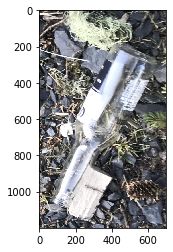

In [15]:
#210 147
x = 2300,
y=500
height=1000
width = 500
trm_image_147 = images[147][500:500+1000,2300:2300+500] 
trm_image_210 = images[210][1000:2200,3000:3700]
plt.imshow(trm_image_210)

In [16]:
trm_images[147] = trm_image_147
trm_images[210] = trm_image_210
trm_images[210].shape

(1200, 700, 3)

In [17]:
trm_images_resize=[]
for trm_image in trm_images:
    resize = cv2.resize(trm_image,(120,120))
    trm_images_resize.append(resize)

In [18]:
index=0
while index<5:
    print(trm_images_resize[index].shape,index)
    index+=1

(120, 120, 3) 0
(120, 120, 3) 1
(120, 120, 3) 2
(120, 120, 3) 3
(120, 120, 3) 4


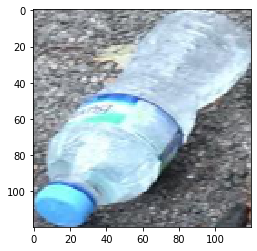

In [19]:
plt.imshow(trm_images_resize[0])

### trm_images_resizeとtrm_imagesの形や性質に違いがあるかを確認

In [20]:
type(trm_images_resize[0])

numpy.ndarray

In [21]:
type(trm_images[0])

numpy.ndarray

In [22]:
trm_images

[array([[[144, 145, 149],
         [115, 116, 120],
         [118, 119, 123],
         ...,
         [137, 138, 140],
         [122, 123, 125],
         [104, 105, 107]],
 
        [[127, 128, 132],
         [131, 132, 136],
         [163, 164, 168],
         ...,
         [147, 148, 150],
         [136, 137, 139],
         [124, 125, 127]],
 
        [[139, 140, 144],
         [160, 161, 165],
         [187, 188, 192],
         ...,
         [146, 147, 149],
         [158, 159, 161],
         [162, 163, 165]],
 
        ...,
 
        [[154, 153, 161],
         [132, 131, 139],
         [120, 119, 127],
         ...,
         [ 62,  56,  58],
         [ 94,  88,  90],
         [ 90,  81,  84]],
 
        [[142, 142, 150],
         [133, 133, 141],
         [131, 131, 139],
         ...,
         [130, 124, 128],
         [162, 156, 160],
         [153, 147, 151]],
 
        [[133, 136, 143],
         [117, 120, 127],
         [117, 120, 127],
         ...,
         [155, 150, 154],
  

In [23]:
trm_images_resize

[array([[[136, 137, 141],
         [125, 126, 130],
         [143, 144, 148],
         ...,
         [149, 150, 152],
         [132, 133, 135],
         [113, 114, 116]],
 
        [[141, 142, 146],
         [170, 171, 175],
         [160, 161, 165],
         ...,
         [147, 148, 151],
         [152, 154, 156],
         [160, 161, 163]],
 
        [[130, 131, 135],
         [134, 135, 139],
         [143, 143, 147],
         ...,
         [127, 128, 130],
         [150, 151, 153],
         [154, 155, 157]],
 
        ...,
 
        [[139, 135, 142],
         [146, 141, 149],
         [141, 138, 148],
         ...,
         [ 36,  29,  31],
         [ 63,  54,  54],
         [ 71,  60,  60]],
 
        [[151, 150, 158],
         [127, 126, 134],
         [115, 114, 122],
         ...,
         [ 42,  36,  40],
         [ 82,  76,  78],
         [ 92,  83,  86]],
 
        [[134, 136, 143],
         [122, 124, 131],
         [111, 113, 121],
         ...,
         [104,  99, 103],
  

### trm_imaesはリストだから、dataframeにしてdataと結合する。

In [24]:
image_df = pd.Series(trm_images_resize)

In [25]:
image_df = pd.DataFrame(image_df)

In [26]:
image_df

,0
0,"[[[136, 137, 141], [125, 126, 130], [143, 144,..."
1,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6..."
2,"[[[140, 135, 126], [129, 123, 114], [116, 110,..."
3,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5..."
4,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],..."
...,...
209,"[[[39, 34, 8], [68, 69, 41], [103, 111, 80], [..."
210,"[[[154, 135, 122], [62, 63, 59], [105, 104, 10..."
211,"[[[204, 188, 165], [221, 205, 182], [170, 152,..."
212,"[[[177, 156, 136], [190, 168, 154], [67, 45, 3..."


In [27]:
image_df.columns = ['img']
##これはカラム名をimgにして分かりやすくしている。

In [28]:
image_df.head()

,img
0,"[[[136, 137, 141], [125, 126, 130], [143, 144,..."
1,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6..."
2,"[[[140, 135, 126], [129, 123, 114], [116, 110,..."
3,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5..."
4,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],..."


In [29]:
type(image_df)

pandas.core.frame.DataFrame

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
df = pd.concat([data, image_df], axis=1)
df.head()

##横に結合したものが得られた。

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area,img
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0,1225.0,153.0,198.0,14765.5,"[[[136, 137, 141], [125, 126, 130], [143, 144,..."
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0,55.0,93.0,88.0,4273.0,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6..."
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0,557.0,89.0,236.0,17734.0,"[[[140, 135, 126], [129, 123, 114], [116, 110,..."
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0,127.0,447.0,1322.0,403954.0,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5..."
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0,1168.0,240.0,122.0,23393.0,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],..."


### ラベルと結合する

In [32]:
label = pd.read_csv("dataset_team4/Label.csv")

In [39]:
label['Label']

{'bottle or petbottle', 'flammable', 'nonflammable'}

In [40]:
df_label = pd.concat([df, label['Label']], axis=1)

In [43]:
df_label.head()

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area,img,Label
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0,1225.0,153.0,198.0,14765.5,"[[[136, 137, 141], [125, 126, 130], [143, 144,...",bottle or petbottle
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0,55.0,93.0,88.0,4273.0,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6...",nonflammable
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0,557.0,89.0,236.0,17734.0,"[[[140, 135, 126], [129, 123, 114], [116, 110,...",bottle or petbottle
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0,127.0,447.0,1322.0,403954.0,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5...",bottle or petbottle
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0,1168.0,240.0,122.0,23393.0,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],...",nonflammable


In [44]:
df_trash = df_label.loc[:, ['img', 'Label']]

In [45]:
df_trash

,img,Label
0,"[[[136, 137, 141], [125, 126, 130], [143, 144,...",bottle or petbottle
1,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6...",nonflammable
2,"[[[140, 135, 126], [129, 123, 114], [116, 110,...",bottle or petbottle
3,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5...",bottle or petbottle
4,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],...",nonflammable
...,...,...
209,"[[[39, 34, 8], [68, 69, 41], [103, 111, 80], [...",flammable
210,"[[[154, 135, 122], [62, 63, 59], [105, 104, 10...",bottle or petbottle
211,"[[[204, 188, 165], [221, 205, 182], [170, 152,...",flammable
212,"[[[177, 156, 136], [190, 168, 154], [67, 45, 3...",flammable


# 以下、途中経過だからあんまり気にしないでください

# 空リストがあってなんかエラーになるからそこを何とかしたいな
例えば210とか。

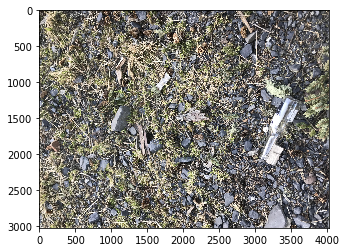

In [33]:
image_size = 60
image = Image.open('dataset_team4/img_team4/batch_14/000096.jpg')
image = image.convert("RGB")
#image = image.resize((image_size, image_size))
sample = np.asarray(image)
plt.imshow(sample)

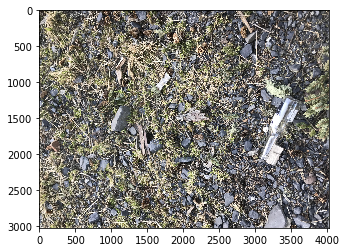

In [34]:
plt.imshow(images[210])

In [35]:
images[210]

array([[[143, 140, 125],
        [142, 139, 124],
        [143, 140, 125],
        ...,
        [115, 113, 101],
        [115, 113, 101],
        [102, 100,  88]],

       [[142, 139, 124],
        [144, 141, 126],
        [146, 143, 128],
        ...,
        [108, 106,  94],
        [112, 110,  98],
        [114, 112, 100]],

       [[130, 127, 112],
        [138, 135, 120],
        [145, 142, 127],
        ...,
        [ 92,  89,  80],
        [ 99,  96,  87],
        [114, 111, 102]],

       ...,

       [[ 80,  78,  79],
        [ 79,  77,  78],
        [ 81,  79,  80],
        ...,
        [110, 113, 118],
        [111, 114, 119],
        [113, 116, 121]],

       [[ 69,  67,  68],
        [ 71,  69,  70],
        [ 81,  79,  80],
        ...,
        [105, 108, 113],
        [108, 111, 116],
        [113, 116, 121]],

       [[ 86,  84,  85],
        [ 78,  76,  77],
        [ 74,  72,  73],
        ...,
        [104, 107, 112],
        [108, 111, 116],
        [114, 117, 122]]

In [36]:
images[210].shape

(3024, 4032, 3)

In [37]:
print(x[210])
print(y[210])
print(height[210])
print(width[210])

IndexError: tuple index out of range

In [ ]:
print(int(x[210]))
print(int(y[210]))
print(int(height[210]))
print(int(width[210]))

In [ ]:
triming_210 = images[210][int(y[210]):int(y[210]+height[210]),int(x[210]):int(x[210]+width[210])]
triming_210
#高さが0になっちゃうの意味わからん。heightの値である587が高さになって欲しい。幅はちゃんと906でいい感じ。なぜ高さだけうまくいかんの？？？
#shape=(高さ、幅、レイヤ)という意味。
#arrayの表示は[]で空っぽいのに幅があるのも意味わからん。

In [ ]:
for i in range(214):
    if not (trm_images[i].any):
        print(i)

In [ ]:
plt.imshow(trm_images[210])

In [ ]:
index=0
while index<214:
    print(trm_images[index].shape,index)
    index+=1


In [ ]:
#210 147
x = 2300,
y=500
height=1000
width = 500
trm_image_147 = images[147][500:500+1000,2300:2300+500] 
trm_image_210 = images[210][1000:2200,3000:3700]
plt.imshow(trm_image_210)

In [ ]:
plt.imshow(images[210])